## Linear Regression

### BoomBike sharing case study

#### Problem statement:

Boombikes, a bike sharing company has recently suffered considerable losses due to ongoing Corona pandemic and wants to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state 

The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd

Import other libraries needed for analysis 

In [2]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import file in dataframe
day = pd.read_csv('C:\\Users\\saifr\\Documents\\Python Data files\\day.csv',encoding='UTF-8')
# We can check the encoding using an application or tool like notepad or notepad++

In [4]:
# Let's have a look at the data
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Let's check for the null values, if any, and other details
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We can see there are no null values in the dataset and there are a total of 16 columns and 730 rows

In [6]:
# Let's have a look at the value spread of the variables
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In the given dataset, we have a few columns like season, month, weekday in numerical values which represent the categorical values. We are going to map them into respective categorical variables that we have in the data dictionary

In [7]:
# Mapping variables season, yr, mnth, weekday, weathersit
day['season'] = day['season'].map({1: 'spring', 2: 'summer',3:'fall', 4:'winter'})
day['yr'] = day['yr'].map({0: '2018',1:'2019'})
day['mnth'] = day['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
day['weekday'] = day['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
day['weathersit'] = day['weathersit'].map({1: 'Partly cloudy',2:'Mist & Cloudy',3:'Light Rain',4:'Heavy Rain'})

In [8]:
# Let's have a look at the dataframe
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,0,Sat,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,Sun,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,Mon,1,Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,Tue,1,Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,Wed,1,Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#Let's convert the instant variable into a categorical variables since it has no ordered relation with the target variable.
day['instant'] = day['instant'].astype('string')

In [10]:
#Converting date object into date type
import datetime as dt
day['dteday'] = day['dteday'].apply(lambda x: dt.datetime.strptime(x,"%d-%m-%Y"))

In [11]:
# Let's have a look at the dataframe
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,0,Sat,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,2018,Jan,0,Sun,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,2018,Jan,0,Mon,1,Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,2018,Jan,0,Tue,1,Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,2018,Jan,0,Wed,1,Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Step 2: Visualising the Data:
Let's now try to understand the data.

Let's have a look at the numeric variables and the associations between them 

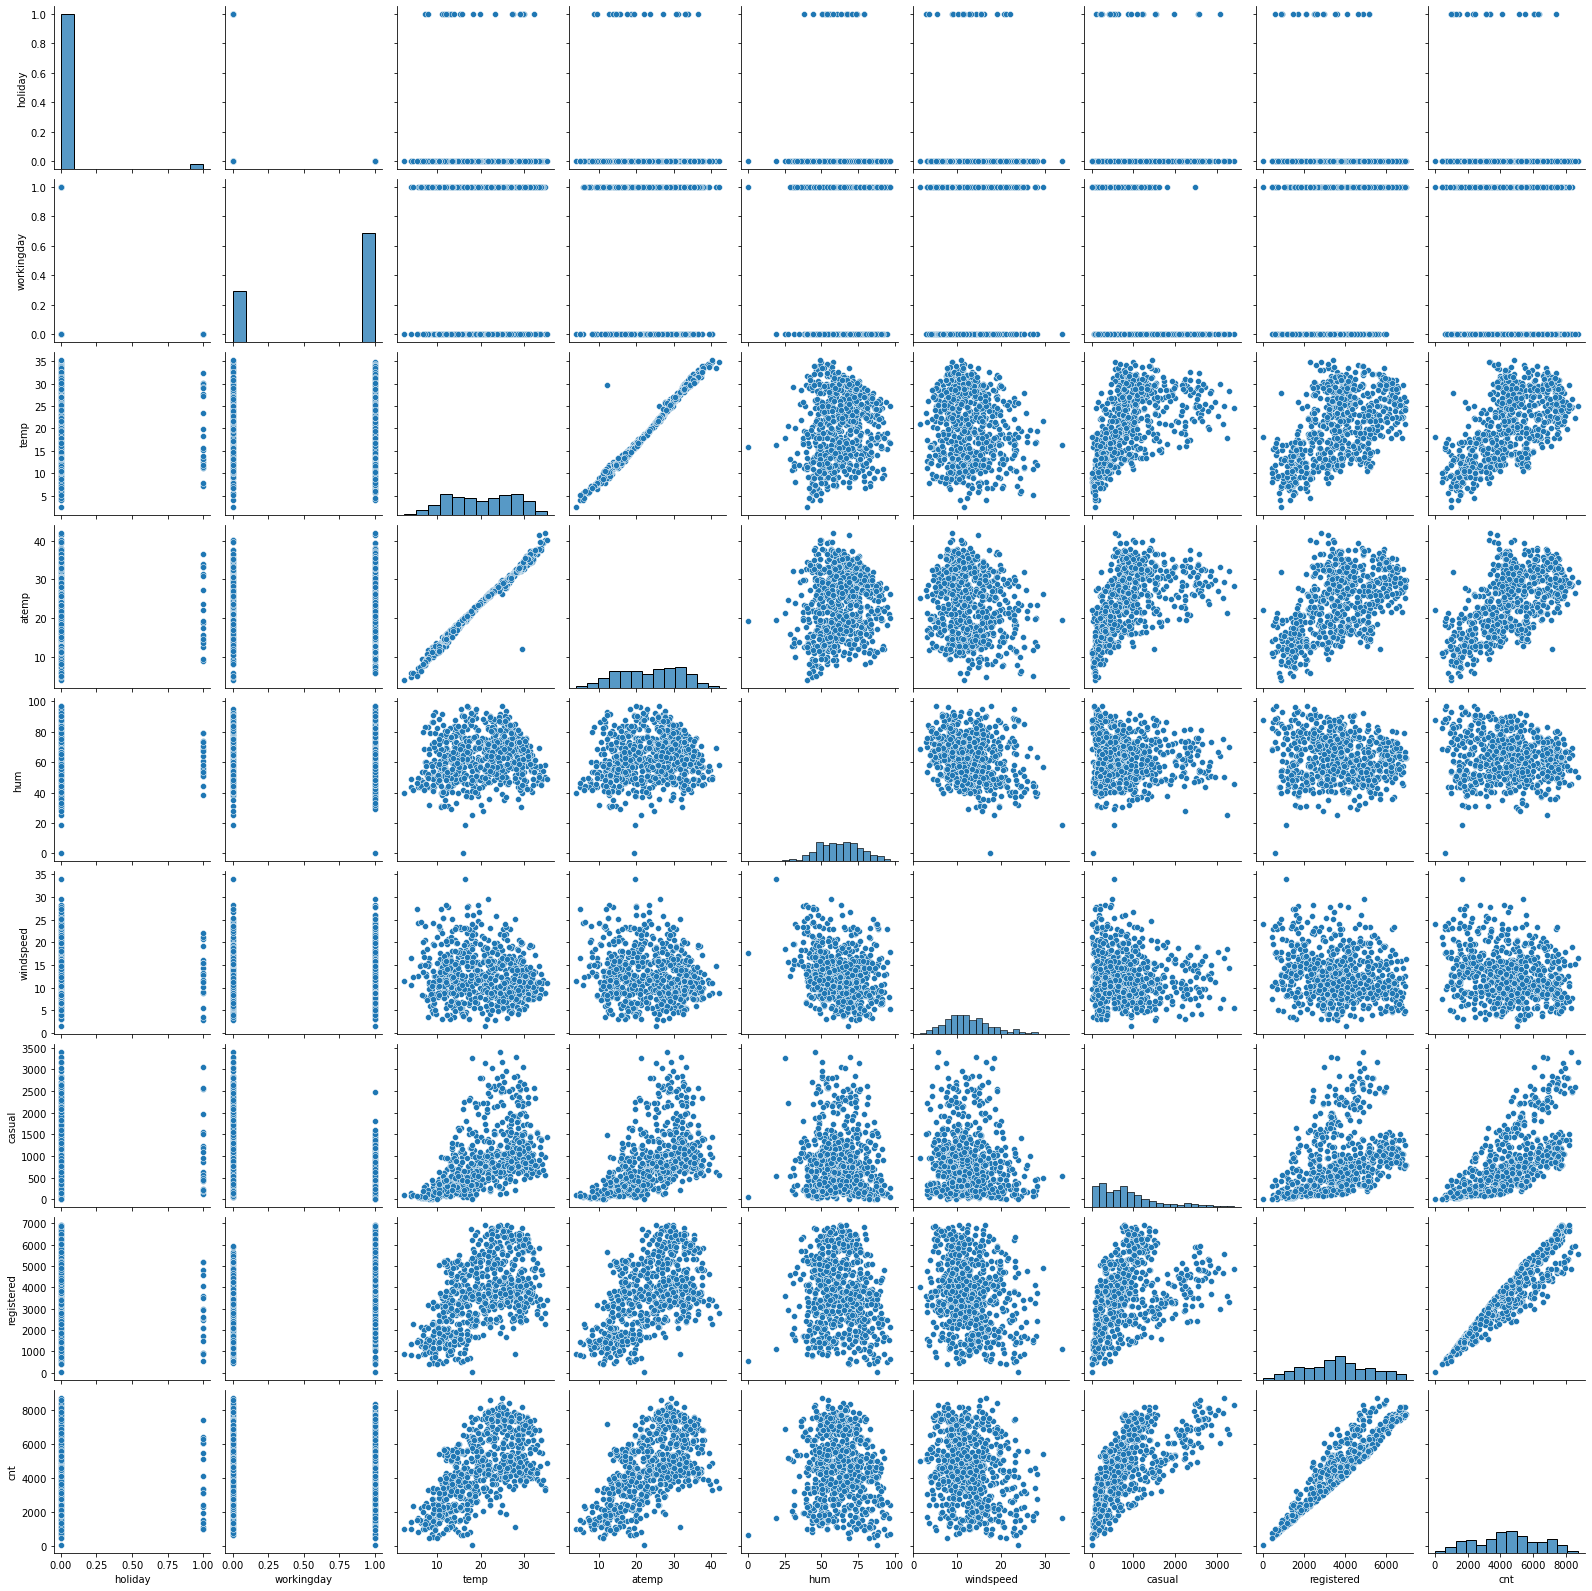

In [12]:
#Using seaborn pairplot to understand correlation
sns.pairplot(day)
plt.show()

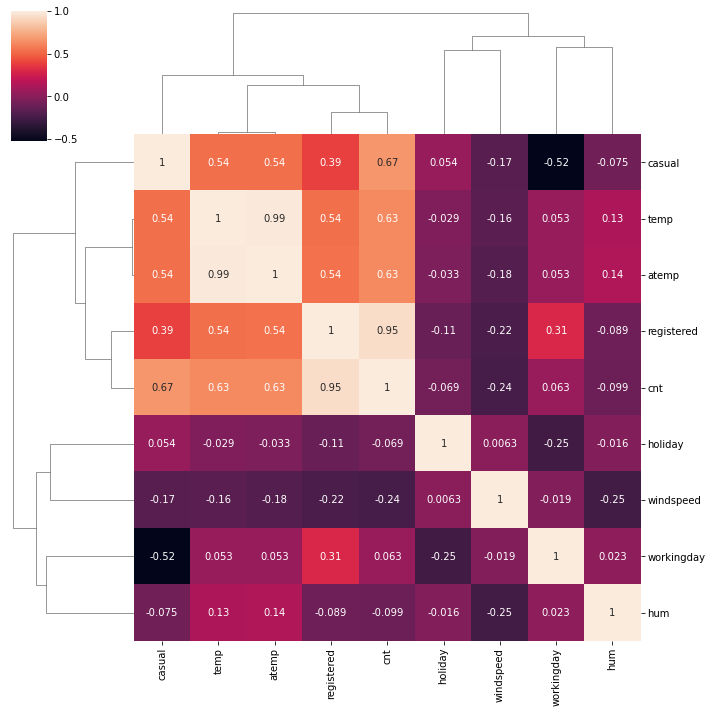

In [13]:
#Understanding correlation between the numeric columns
day_cor = day.corr()
sns.clustermap(day_cor,annot=True)
plt.show()

In this correlation graph, we can see very high correlation between two variables - temp and atemp

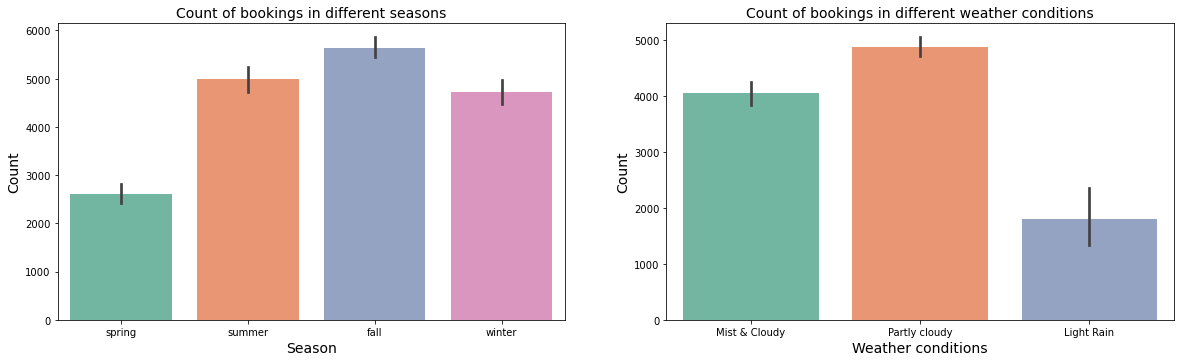

In [14]:
#Finding relation between categorical data and count
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.barplot(x = 'season', y = 'cnt', data = day, palette='Set2')
plt.title('Count of bookings in different seasons',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.subplot(2,2,2)
sns.barplot(x = 'weathersit', y = 'cnt', data = day, palette='Set2')
plt.title('Count of bookings in different weather conditions',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xlabel('Weather conditions',fontsize=14)
plt.show()

From the above graph we can understand the below:
- Bookings are more during the fall than the spring
- Bookings are more during Partly cloudy weather conditions

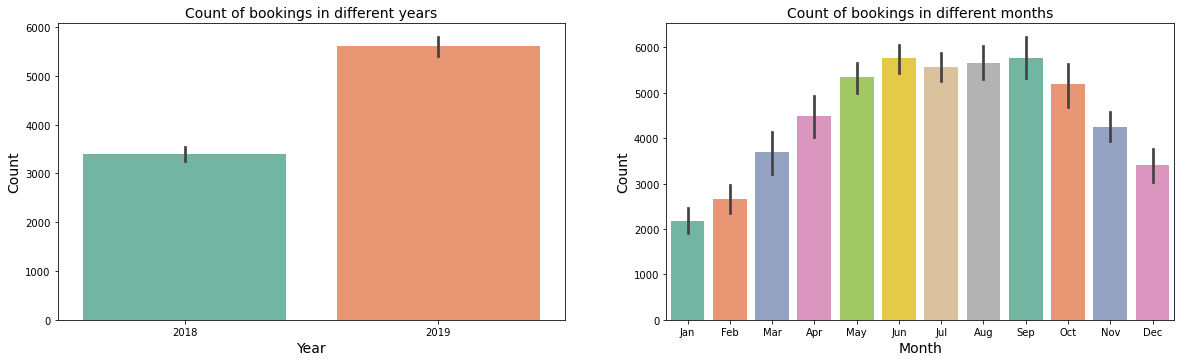

In [15]:
#Finding relation between categorical data and count
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.barplot(x = 'yr', y = 'cnt', data = day, palette='Set2')
plt.title('Count of bookings in different years',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.subplot(2,2,2)
sns.barplot(x = 'mnth', y = 'cnt', data = day, palette='Set2')
plt.title('Count of bookings in different months',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xlabel('Month',fontsize=14)
plt.show()

From the above graph we can understand the below:
- Bookings are more during the later year (2019). This can be due to slow popularity of the brand and business
- Bookings are more during the months September and June than the other months

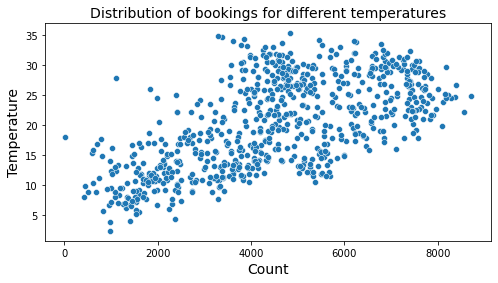

In [16]:
# Finding relation between numeric data and count
plt.figure(figsize=(8, 4))
sns.scatterplot(x = 'cnt', y = 'temp', data = day)
plt.title('Distribution of bookings for different temperatures',fontsize=14)
plt.ylabel('Temperature',fontsize=14)
plt.xlabel('Count',fontsize=14)
plt.show()

We can see, from the above graph, the bookings are more with more temperature. 

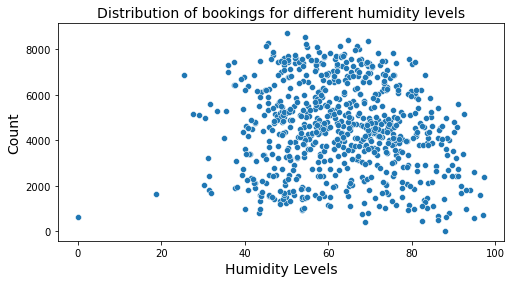

In [17]:
# Finding relation between numeric data and count
plt.figure(figsize=(8, 4))
sns.scatterplot(y = 'cnt', x = 'hum', data = day)
plt.title('Distribution of bookings for different humidity levels',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xlabel('Humidity Levels',fontsize=14)
plt.show()

There is not much relation of count with humidity levels. But there is a high concentration of counts at the 40 to 80 humidity levels

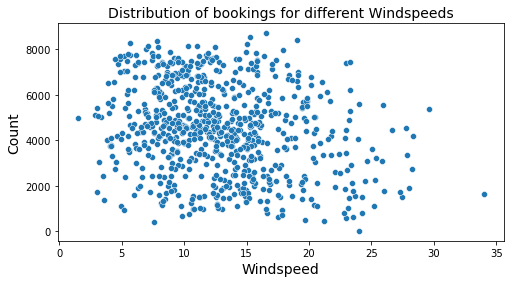

In [18]:
# Finding relation between numeric data and count
plt.figure(figsize=(8, 4))
sns.scatterplot(y = 'cnt', x = 'windspeed', data = day)
plt.title('Distribution of bookings for different Windspeeds',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xlabel('Windspeed',fontsize=14)
plt.show()

There is not much relation between windspeed and count as it seems from the scatterplot

### Step 3: Data Preparation:


We can see there is a very high correlation between temp and atemp. So we can keep one and drop the other for our analysis

We are also going to drop the unwanted variables from the dataset for bulding the model

In [19]:
#Dropping 'atemp' form the dataset
day.drop(labels='atemp',axis=1,inplace=True)

In [20]:
#Dropping 'casual' and 'registered' from the dataset since they are part of the predicted variable - 'cnt'. The column 'instant' and 'dteday' also has no relation with the count
day.drop(labels=['casual','registered','instant','dteday'],axis=1,inplace=True)

In [21]:
# Let's have a look at the dataframe now
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Partly cloudy,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,Partly cloudy,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,Partly cloudy,9.305237,43.6957,12.522300,1600


For designing a Linear model we need the categorical data in the dateset in numerical format for processing. So we are going to convert them to dummy variables to be able to design the model.

In [22]:
# Getting dummies for the categorical variables. Storing them in new dataframes to merge it with the original dataframe later.
season = pd.get_dummies(day['season'], drop_first=True)
mnth = pd.get_dummies(day['mnth'], drop_first=True)
weekday = pd.get_dummies(day['weekday'], drop_first=True)
weathersit = pd.get_dummies(day['weathersit'], drop_first=True)

In [23]:
# Also let's convert yr to a machine readable numeric variable for building the linear model
day['yr'] = day['yr'].map({'2018': 0, '2019': 1})

In [24]:
# Add the results to the original day dataframe
day = pd.concat([day,season,mnth,weekday,weathersit],axis=1)

In [25]:
#To display all columns in the dataframe
pd.set_option('display.max_columns', None)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist & Cloudy,Partly cloudy
0,spring,0,Jan,0,Sat,0,Mist & Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,spring,0,Jan,0,Sun,0,Mist & Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,spring,0,Jan,0,Mon,1,Partly cloudy,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,spring,0,Jan,0,Tue,1,Partly cloudy,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,spring,0,Jan,0,Wed,1,Partly cloudy,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [26]:
# Drop 'season','mnth','weekday','weathersit' as we have created the dummies for it
day.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [27]:
# Let's have a look at the shape of the new dataframe 
day.shape

(730, 29)

### Step 4: Splitting the Data into Training and Testing Sets

In [28]:
# Importing test train data split library from sklearn to split data for modelling.
from sklearn.model_selection import train_test_split
# Splitting data into test and train dataframe
np.random.seed(0)
day_train, day_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 38)

In [29]:
# Let's have a look at the shape of both the dataframes
print(day_train.shape)
print(day_test.shape)

(510, 29)
(219, 29)


Now let's have a look at the training dataset

In [30]:
day_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist & Cloudy,Partly cloudy
706,1,0,0,15.648347,91.1250,6.792393,5582,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
579,1,0,1,31.399153,64.2500,14.458064,7175,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
155,0,0,0,26.581653,65.2500,9.292364,4906,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
538,1,0,0,29.998347,53.4583,12.041307,7458,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
211,0,0,0,33.039153,48.0833,11.042471,4302,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


#### Rescaling the numerical variables

In [31]:
# We can see some of the variables have different values, range and units. Thus, it is better to scale them using sklearn minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [32]:
#Instantiate an object for scaling
scaler = MinMaxScaler()

#Create a list of numeric variables to scale
num_vars=['temp','hum','windspeed','cnt']

# Transform and Fit on the original dataset
day_train[num_vars] = scaler.fit_transform(day_train[num_vars])

In [33]:
#Let's have a look at the dataset
day_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist & Cloudy,Partly cloudy
706,1,0,0,0.378139,0.937018,0.162836,0.639669,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
579,1,0,1,0.889150,0.660668,0.398705,0.822941,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
155,0,0,0,0.732854,0.670951,0.239759,0.561896,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
538,1,0,0,0.843703,0.549700,0.324343,0.855499,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
211,0,0,0,0.942358,0.494430,0.293609,0.492407,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


#### Dividing into X and Y sets for the model building

For building the linear model we need to divide the dataset into the dependent and independent variables.

In [34]:
# Creating dependent and independent variables
y_train = day_train.pop('cnt')
X_train = day_train

### Step 5: Building the linear model

For this analysis, we are going to use RFE to get the best 13 features among the various features that are there in the model as of now. After that we are going to check manually for the best fitting model using R-squared, p-value and VIF estimations.

In [35]:
# Importing RFE and LinearRegression libraries from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Running RFE with the output number of the variable equal to 13
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)           
rfe = rfe.fit(X_train, y_train)

In [37]:
# Let's have a look at the best features filtered by RFE for model construction
print(X_train.columns[rfe.support_])

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Jul', 'Sat', 'Sun', 'Mist & Cloudy', 'Partly cloudy'],
      dtype='object')


In [38]:
# Keeping only the best 13 features that we have from RFE for further analysis and model building
X_train = X_train[X_train.columns[rfe.support_]]

In [39]:
# Import linear regression model library statsmodels
import statsmodels.api as sm
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_rfe = sm.OLS(y_train, X_train_lm).fit()

In [40]:
#Let's look at the model summary statistics
print(lr_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.34e-188
Time:                        14:45:07   Log-Likelihood:                 495.61
No. Observations:                 510   AIC:                            -965.2
Df Residuals:                     497   BIC:                            -910.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0789      0.038      2.097

We can see we have a high R-squared value of 0.83 and adjusted R-squared of 0.83 by using the 13 features from the RFE. Also, the signifinace of these features are near 0 meaning it is significant other than the feature 'Sun'. This model looks good but it suggests that there can be strong multicolearity between the variables that might affect our model. So let's first go ahead and check the VIF values of all the features that we are considering for analysis.

#### Checking VIF

In [41]:
# Check for the VIF values of the feature variables. Import library from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,89.43
9,Sat,19.26
10,Sun,17.65
12,Partly cloudy,9.20
11,Mist & Cloudy,7.68
1,holiday,3.79
3,temp,2.92
6,spring,2.66
4,hum,1.93
7,winter,1.77


We can see there is a very high VIF value for some of the features in the dataset. We need to drop the features that have high values of VIF and prepare our model. Let's go ahead and drop those columns with high VIFs one after the other.

In [43]:
# We can see the highest VIF is shown by the feature - 'workingday'. Let's drop this feature and create another model
X_train = X_train.drop(labels=['workingday'], axis=1)

In [44]:
# Check model after feature dropping
X_train_ft = X_train
# Add a constant
X_train_lm = sm.add_constant(X_train_ft)

# Create a first fitted model after RFE
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [45]:
# Let's look at the model summary statistics
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.34e-188
Time:                        14:45:07   Log-Likelihood:                 495.61
No. Observations:                 510   AIC:                            -965.2
Df Residuals:                     497   BIC:                            -910.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1296      0.046      2.799

In [46]:
# Recalculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,17.79
2,temp,15.42
11,Partly cloudy,10.82
10,Mist & Cloudy,7.03
4,windspeed,5.17
5,spring,3.30
6,winter,2.21
0,yr,2.09
7,Jul,1.33
8,Sat,1.22


After removing the 'workingday' feature, we can see there is not much changes in the R-squared and p-value of the model. But we can see there are still some predictors with high VIF values. We have to drop them as well.

In [47]:
# Dropping 'hum' predictor as it is having very high VIF value
X_train = X_train.drop(labels=['hum'],axis=1)

In [48]:
# Check model after feature dropping
X_train_ft = X_train
# Add a constant
X_train_lm = sm.add_constant(X_train_ft)

# Create second fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [49]:
#Let's look at the model summary statistics
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.5
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          8.24e-186
Time:                        14:45:07   Log-Likelihood:                 486.18
No. Observations:                 510   AIC:                            -948.4
Df Residuals:                     498   BIC:                            -897.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0167      0.032     -0.517

In [50]:
# Recalculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,10.49
10,Partly cloudy,10.39
9,Mist & Cloudy,5.76
3,windspeed,5.12
4,spring,2.83
0,yr,2.08
5,winter,1.71
6,Jul,1.30
7,Sat,1.22
8,Sun,1.19


After removing the 'hum' feature, we can see there is not much changes in the R-squared and p-value of most of the predictors in the model. There is a high p-value for const. Let's drop other high VIF predictors and check.

In [51]:
# Dropping 'Mist & Cloudy' predictor as it is having high VIF value and can improve model performance
X_train = X_train.drop(labels=['Mist & Cloudy'],axis=1)

In [52]:
# Check model after feature dropping
X_train_ft = X_train
# Add a constant
X_train_lm = sm.add_constant(X_train_ft)

# Create third fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [53]:
# Let's look at the model summary statistics
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     208.5
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          4.60e-171
Time:                        14:45:07   Log-Likelihood:                 448.49
No. Observations:                 510   AIC:                            -875.0
Df Residuals:                     499   BIC:                            -828.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1810      0.025      7.210

In [54]:
# Recalculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.06
3,windspeed,4.85
9,Partly cloudy,2.68
0,yr,2.06
4,spring,1.93
5,winter,1.36
6,Jul,1.28
7,Sat,1.22
8,Sun,1.18
1,holiday,1.04


Removing the 'Mist & Cloudy' feature improved all the parameters in a very effective way. We can see the R-squared has dropped marginally to .80 but all the VIF values are now low. It means that we can trust on our model. But there is just one variable having a marginally high p-value - 'Sat'. Let's go ahead and drop this feature and check our model.

In [55]:
# Dropping predictor 'Sat' since it is having high p-value and cannot be trusted in the model
X_train = X_train.drop(labels=['Sat'],axis=1)

In [56]:
# Check model after feature dropping
X_train_ft = X_train
# Add a constant
X_train_lm = sm.add_constant(X_train_ft)

# Create fourth fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [57]:
#Let's look at the model summary statistics
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     230.9
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          8.75e-172
Time:                        14:45:07   Log-Likelihood:                 447.38
No. Observations:                 510   AIC:                            -874.8
Df Residuals:                     500   BIC:                            -832.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1827      0.025      7.277

In [58]:
# Recalculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.04
3,windspeed,4.77
8,Partly cloudy,2.67
0,yr,2.06
4,spring,1.93
5,winter,1.36
6,Jul,1.28
7,Sun,1.15
1,holiday,1.03


So finally we have a linear model with R-squared and **adjusted R-squared** value of **0.80**. All the **p-values** are near **zero** meaning all the variables in the model are **significant**. And lastly, all the predictors in the model are having **low VIF values** meaning they show **very less multicollinearity** and thus the model can be trusted.

### Step 6: Residual analysis on trained dataset

In [59]:
# Finding output value for y for the model and tally with actual y values in the train dataset
y_train_cnt = lr_4.predict(X_train_lm)

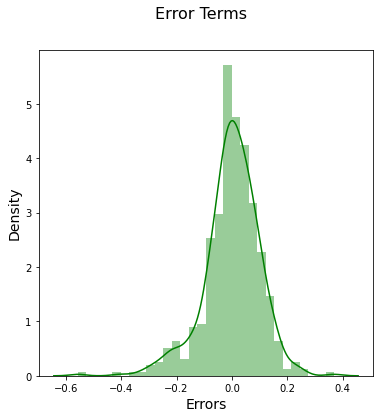

In [60]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=[6,6])
sns.distplot((y_train - y_train_cnt), bins = 30,color='green')
fig.suptitle('Error Terms', fontsize = 16)                  
plt.xlabel('Errors', fontsize = 14) 
plt.ylabel('Density', fontsize = 14) 
plt.show()

From the above graph we can see that the residual errors are **centered around zero** (mean) with a normal distribution. This means the model has minimum errors and the prediction can be trusted.

### Step 8: Making Predictions Using the Final Model on the Test set

In [61]:
# Transforming test numeric variables into the scaled margin
day_test[num_vars] = scaler.transform(day_test[num_vars])

In [62]:
# Creating test output dependent and independent columns 
y_test = day_test.pop('cnt')
X_test = day_test

In [63]:
# Keeping only predictor columns as in Linear regression model in the test dataset
X_test = X_test[X_train.columns]

In [64]:
# Adding constant variable to test dataframe
X_test_fm = sm.add_constant(X_test)

In [65]:
# Making predictions using the final model
y_pred_fm = lr_4.predict(X_test_fm)

### Step 8: Model Evaluation

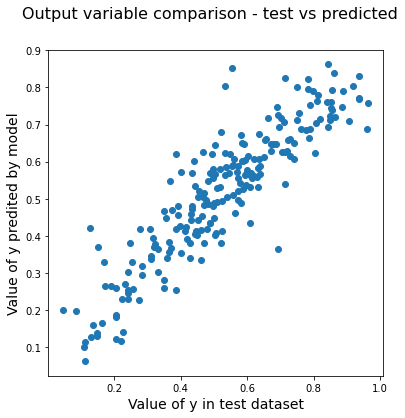

In [66]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure(figsize=[6,6])
plt.scatter(y_test, y_pred_fm)
fig.suptitle('Output variable comparison - test vs predicted', fontsize = 16)            
plt.xlabel('Value of y in test dataset', fontsize = 14)                         
plt.ylabel('Value of y predited by model', fontsize = 14) 
plt.show()

In the test dataset, we can see a straight line relationship between the predicted and actual values of y(output variable). From this we can conclude that the model is predicting near accurate results

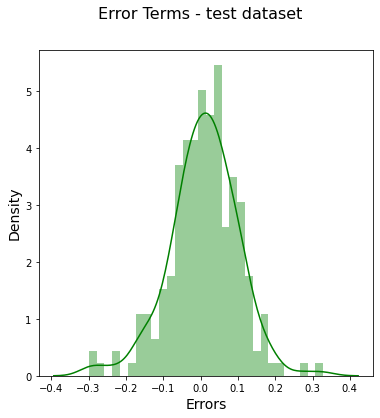

In [67]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=[6,6])
sns.distplot((y_test - y_pred_fm), bins = 30,color='green')
fig.suptitle('Error Terms - test dataset', fontsize = 16)                  
plt.xlabel('Errors', fontsize = 14) 
plt.ylabel('Density', fontsize = 14) 
plt.show()

In the test dataset, the residual errors are centered around zero (mean) with a normal distribution. This means that the errors are very less and the model predicts accurate output results

Finally, let's calculate the R-squared value of the model on the test dataset to understand the performance of the model  and find the effectiveness of output for the test set.

In [68]:
# Calculating R-squaerd value of the test dataset for the linear regression model 
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred_fm)
print(r2)

0.804449839678152


So the final equation to predict the output is:

cnt (count) = 0.182 + 0.233 * yr - 0.106 * holiday + 0.446 * temp - 0.148 * windspeed - 0.107 * spring + 0.039 * winter - 0.067 * Jul - 0.036 * Sun + 0.094 * Partly cloudy

### Summary:

#### Linear regression model summary:

The linear regression model is a good model that can predit near accurate results. We can see high R-squared value of **0.80** in both the training and test datasets which is a good value for output prediction. Also, we have significant (near zero) p-values for all the predictor features in the model. Lastly, we reduced the feature collinearity to a very large extent and the final model gives accurate results.

#### Business summary:

The following can be said for increasing the count of bookings for the bike rental company - Boombikes:
- People prefer to rent bikes at higher temperatures
- The most bookings are made when the weather conditions are Partly cloudy
- People tend to prefer bike rentals during the fall season
- There was a high demand of rental bikes in 2019 compared to 2018